# Template API Notebook

This is a template notebook. The first heading should be the title of what notebook is about. For example, if it is a neo4j tutorial the heading should be `Neo4j API`.

- Add description of what the notebook does.
- Point to references, e.g. (neo4j.API.md)
- Add citations.
- Keep the notebook flow clear.
- Comments should be imperative and have a period at the end.
- Your code should be well commented. 

The name of this notebook should in the following format:
- if the notebook is exploring `pycaret API`, then it is `pycaret.API.ipynb`

Follow the reference to write notebooks in a clear manner: https://github.com/causify-ai/helpers/blob/master/docs/coding/all.jupyter_notebook.how_to_guide.md

In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [46]:
import logging
# Import libraries in this section.
# Avoid imports like import *, from ... import ..., from ... import *, etc.
import template_utils
import river
import river.linear_model
import river.metrics
import river.optim
import time
import typing
import matplotlib.pyplot as plt
import collections

## Configuration

In [39]:
#hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

#hprint.config_notebook()

## Make the notebook flow clear
Each notebook needs to follow a clear and logical flow, e.g:
- Load data
- Compute stats
- Clean data
- Compute stats
- Do analysis
- Show results

## Loading the Data
We load the current Bitcoin price using the CoinGecko API.


In [41]:
#Load the current bitcoin price
btc_price=template_utils.get_bitcoin_price()
print(f"Current Bitcoin Price (USD): {btc_price}")

Current Bitcoin Price (USD): 96812


## Clean the Data 
API calls may fail or return rate-limited responses. Our model skips `None` values internally using checks inside the `Template` class.


## Initial stats 


We collect a few sample prices to get a sense of data variability.


In [43]:
prices = [template_utils.get_bitcoin_price() for _ in range(5)]
prices = [p for p in prices if p is not None]
print("Sample Prices:", prices)

Sample Prices: [96859, 96859, 96859, 96859, 96859]


## 4. Stream, Train, and Visualize Bitcoin Price Predictions

This block contains the main implementation of real-time Bitcoin price prediction using an online learning model (River's `LinearRegression`). The logic is encapsulated in a class called `Template` which performs the following:

- **Model Initialization**:
  - Sets up a linear regression model (`river.linear_model.LinearRegression`) using stochastic gradient descent.
  - Initializes a Mean Absolute Error (MAE) metric.
  - Fetches the initial Bitcoin price from the CoinGecko API.
  - Initializes lists to track actual and predicted prices over time.

- **Streaming Training Loop** (`method1()`):
  - For a given number of steps:
    - It fetches the current Bitcoin price from the API.
    - It predicts the price using the model based on the previous price.
    - The model is updated (trained) incrementally with the new price using `.learn_one()`.
    - MAE is updated using `.update()`.
    - Both actual and predicted values are stored for visualization.
    - The loop sleeps for 10 seconds to simulate streaming data.

- **Plotting Results** (`plot_results()`):
  - After training, this function plots the actual vs predicted Bitcoin prices.
  - The plot helps assess how well the model tracks price movements over time.

- **Execution Block**:
  - Creates a `Template` object.
  - Runs the training loop for 10 steps.
  - Finally, it plots the results.


Step 1: Actual = 96920 | Predicted = 0.00 | MAE = 96920.00
Step 2: Actual = 96920 | Predicted = 18208334039698.40 | MAE = 9104167019849.20
Step 3: Actual = 96920 | Predicted = -93934845801665953792.00 | MAE = 31311621336666693632.00
Step 4: Actual = 96920 | Predicted = 18208334039698.40 | MAE = 23483720554583506944.00


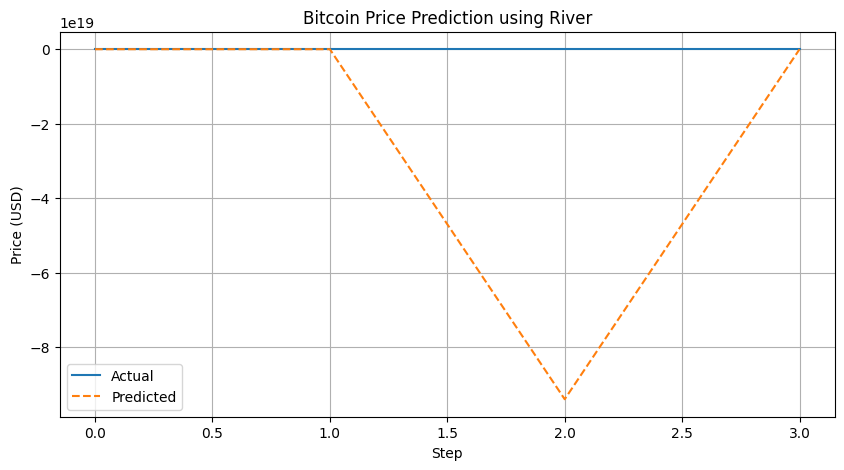

In [47]:
class Template:
    """
    A class to stream Bitcoin prices and perform online learning using River.
    """

    def __init__(self):
        """
        Initializes the linear regression model and MAE metric.
        """
        self.model = river.linear_model.LinearRegression(optimizer=river.optim.SGD(0.01))
        self.metric = river.metrics.MAE()
        self.prev_price: typing.Optional[float] = template_utils.get_bitcoin_price()
        self.window_size = 20  # Rolling window of last 20 points
        self.actuals = collections.deque(maxlen=self.window_size)
        self.predictions = collections.deque(maxlen=self.window_size)
        #self.actuals = []
        #self.predictions = []

    def method1(self, steps: int = 30) -> None:
        """
        Runs the online learning loop for a given number of steps.

        :param steps: Number of streaming data points to train on.
        :return: None
        """
        for step in range(steps):
            current_price = template_utils.get_bitcoin_price()
            if current_price is None or self.prev_price is None:
                _LOG.warning("Skipping due to missing price data.")
                continue

            prediction = self.model.predict_one({'prev_price': self.prev_price})
            self.model.learn_one({'prev_price': self.prev_price}, current_price)
            self.metric.update(current_price, prediction)
            self.actuals.append(current_price)
            self.predictions.append(prediction)
            
            print(
                f"Step {step + 1}: Actual = {current_price} | "
                f"Predicted = {prediction:.2f} | MAE = {self.metric.get():.2f}"
            )

            self.prev_price = current_price
            time.sleep(10)
        
    def plot_results(self) -> None:
        """
        Plots the actual vs predicted Bitcoin prices after training.
        """
        if not self.actuals or not self.predictions:
            print("No data to plot.")
            return

        plt.figure(figsize=(10, 5))
        plt.plot(self.actuals, label="Actual")
        plt.plot(self.predictions, label="Predicted", linestyle="--")
        plt.title("Bitcoin Price Prediction using River")
        plt.xlabel("Step")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid(True)
        plt.show()

def template_function(arg1: int) -> None:
    """
    Placeholder function for demonstration purposes.

    :param arg1: An integer argument (unused here).
    :return: None
    """
    print(f"This is a placeholder function. Received arg1 = {arg1}")


if __name__ == "__main__":
    model = Template()
    model.method1(steps=4)
    model.plot_results()

## The flow should be highlighted using headings in markdown
```
# Level 1
## Level 2
### Level 3
```